<a href="https://colab.research.google.com/github/TsarIvanTheTerrible/TsarIvanTheTerrible/blob/main/CS105_Project_Submission_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2024/25 Term 2
</div>

In [ ]:
from google.colab import files
import pandas as pd
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


uploaded_csv = files.upload()
file_name = next(iter(uploaded_csv))

df = pd.read_csv(io.BytesIO(uploaded_csv[file_name]))


Saving credit.csv to credit (4).csv




#### Dataset: Credit Dataset

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

####**a.** Summarise the background of the dataset [limited to 50 words]

The dataset contains data of individuals applying for a credit facility in a bank. Each row corresponds to a different application and contains attributes captured during an application. There are 18 attributes of an individual that would affect the loan approval status. All attributes may not hold equal weight in influencing the approval process.

####**b.** State the size of the dataset

In [ ]:
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1000
Number of columns: 23


1000 rows and 23 columns

####**c.** For each variable, describe what it represents and its data type (numerical or categorical)

1. ID (categorical) - the unique identification number of the application
2. Checking_Account (categorical) - the status of the checking account
3. Duration (numerical) - credit duration in months
4. Payment_Status (categorical) - credit history
5. Purpose (categorical) - purpose of credit
6. Amount (numerical) - credit amount
7. Savings_Account (categorical) - status of savings account
8. Employment (categorical) - length of current employment
9. Installment (numerical) - installment rate as percentage of disposable income
10. Personal_Status (categorical) - marital status and sex
11. Guarantors (categorical) - other debtors or guarantors
12. Residence_Length (categorical) - number of years staying in current residence
13. Assets (categorical) - asset ownership
14. Age (numerical) - age in years
15. Credit_Rating (numerical) - credit rating
16. Existing_Credits (categorical) - other existing credit in place
17. Housing_Type (categorical) - Type of apartment
18. Num_Credits (categorical) - number of existing credits
19. Occupation (categorical) - occupation
20. Dependents (numerical) - number of dependents
21. Telephone (categorical) - whether applicant has telephone
22. Foreign_Worker (categorical) - whether applicant is a foreign worker
23. Approval (categorical) - approval status of loan

### 2. Data pre-processing [35% of Part I]

####**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

# **Calculation of missing data**

In [ ]:
n_rows, n_cols = df.shape
(n_rows - df.count()) / n_rows *100

,0
ID,0.0
Checking_Account,5.8
Duration,0.0
Payment_Status,0.0
Purpose,0.0
Amount,0.0
Savings_Account,0.0
Employment,0.0
Installment,0.0
Personal_Status,0.0


Checking_Account has 5.8% of data missing, and Dependents has 5% of data missing.

The rest of the variables have no missing data.

# **Resolving Missing Data**

In [ ]:
df['Approval'].corr(df['Dependents'])

-0.0033105498787978855



We propose dropping the dependents column as the correlation between number of dependents and approval is sufficiently small (-0.00331).

We also propose to either remove the rows with missing data or ensure that the empty cells are changed to the most frequent value for checking account for the following reasons:
1. 5.8% of records is small in a 1000 row datasets
2. The approval rate in the rows with missing values for Checking_Account does not seem to be vastly different from types 1, 2 and 3 in the bar chart below titled "Distribution of Checking_Account Types by Approval" . This suggests that the missing values do not impact approval rates and are not particularly significant in this dataset.

As later shown in [2c], our group has opted for the decision to impute the most frequent value into the empty cells for checking account considering that:
1. Unlike dropping rows, which reduces the dataset and may lead to data loss, imputation retains all observations ultimately allowing us to keep the dataset intact.
2. Mode imputation is particularly effective for categorical variables, where replacing missing values with the most common category maintains consistency in the dataset without significantly altering it.

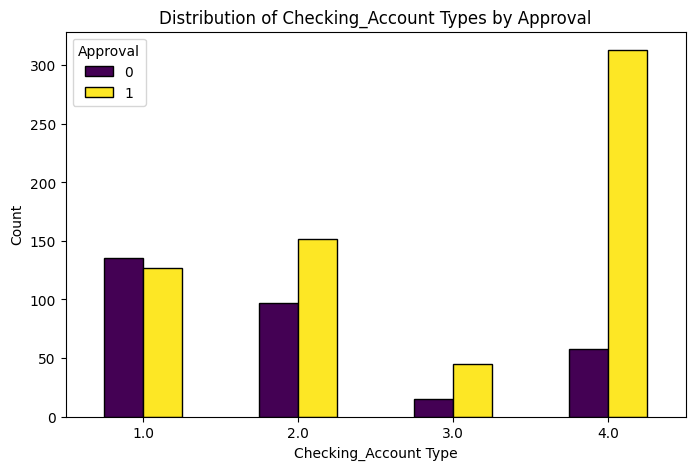

In [ ]:
throw = df.copy()
throw['Checking_Account'].fillna(5)

# Convert to integer type
# throw['Checking_Account'] = throw['Checking_Account'].astype(int)
throw["Checking_Account"] = throw["Checking_Account"].astype(float)

# Count occurrences of each (Checking_Account Type, Approval) combination
counts = throw.groupby(['Checking_Account', 'Approval']).size().unstack()

# Plot bar chart
counts.plot(kind='bar', figsize=(8, 5), colormap='viridis', edgecolor='black')

plt.xlabel("Checking_Account Type")
plt.ylabel("Count")
plt.title("Distribution of Checking_Account Types by Approval")
plt.xticks(rotation=0)
plt.legend(title="Approval")
plt.show()

####**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.



# **General Approach**
In assessing outliers we will first consider:
1. Categorical Entries: Whether there are entries that are outside of the specified range as stated in the "Data Readme 2025" document
2. Numerical Entries: We will identify outliers using the Interquartile range method

We will assess these in turn.

# **Invalid Categorical Entries**

In [ ]:
# Categorical Errors
categorical_columns = {
    "Checking_Account": [1, 2, 3, 4],
    "Payment_Status": [0, 1, 2, 3, 4],
    "Purpose": list(range(0, 11)),  # 0-10 valid
    "Savings_Account": [1, 2, 3, 4, 5],
    "Employment": [1, 2, 3, 4, 5],
    "Personal_Status": [1, 2, 3, 4],
    "Guarantors": [1, 2, 3],
    "Residence_Length": [1, 2, 3, 4],
    "Assets": [1, 2, 3, 4],
    "Existing_Credits": [1, 2, 3],
    "Housing_Type": [1, 2, 3],
    "Occupation": [1, 2, 3, 4],
    "Telephone": [1, 2],
    "Foreign_Worker": [1, 2],
    "Approval": [0, 1]
}

for column, valid_values in categorical_columns.items():
    invalid_rows = df[~df[column].isin(valid_values) | df[column].isna()][["ID", column]]
    total_values = len(df[column])
    invalid_percentage = (len(invalid_rows) / total_values) * 100

    if not invalid_rows.empty:
        print(f"{column} - Found {len(invalid_rows)} invalid values ({invalid_percentage:.2f}% of total data)")
        print("Invalid values and their counts:")
        print(invalid_rows[column].value_counts(dropna=False))
        print("-" * 50)

Checking_Account - Found 58 invalid values (5.80% of total data)
Invalid values and their counts:
Checking_Account
NaN    58
Name: count, dtype: int64
--------------------------------------------------
Residence_Length - Found 12 invalid values (1.20% of total data)
Invalid values and their counts:
Residence_Length
5    12
Name: count, dtype: int64
--------------------------------------------------


# **Numerical Outliers**




<Figure size 1200x800 with 0 Axes>

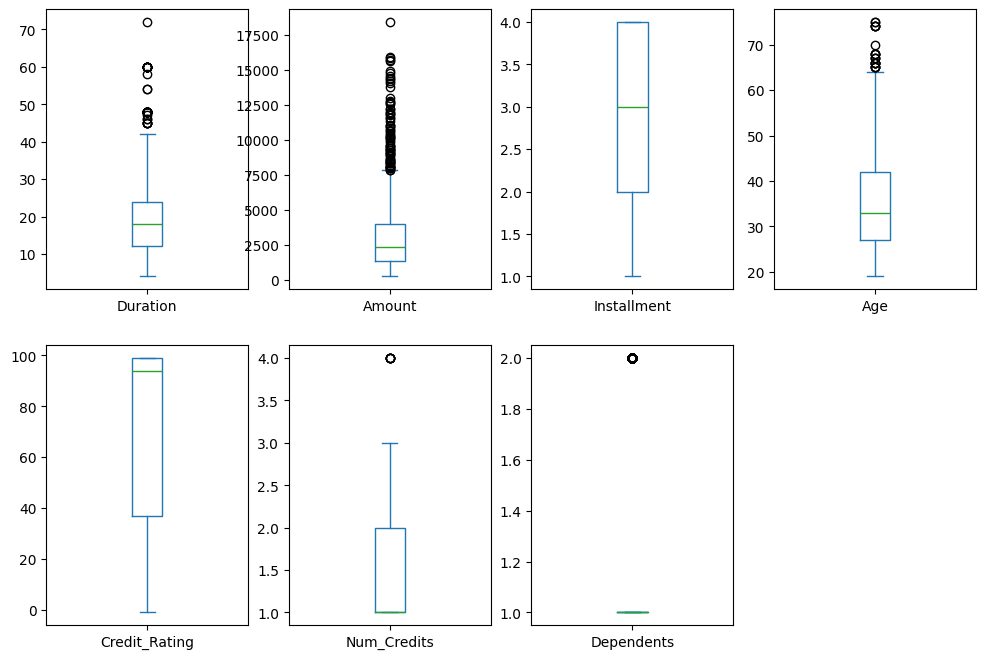

Duration: Found 67 outliers (6.70% of total data)
--------------------------------------------------
Amount: Found 73 outliers (7.30% of total data)
--------------------------------------------------
Installment: Found 0 outliers (0.00% of total data)
--------------------------------------------------
Age: Found 23 outliers (2.30% of total data)
--------------------------------------------------
Credit_Rating: Found 0 outliers (0.00% of total data)
--------------------------------------------------
Num_Credits: Found 6 outliers (0.60% of total data)
--------------------------------------------------
Dependents: Found 149 outliers (14.90% of total data)
--------------------------------------------------


In [ ]:
# Numerical Outliers
numerical_columns = ["Duration", "Amount", "Installment", "Age", "Credit_Rating", "Num_Credits", "Dependents"]

plt.figure(figsize=(12, 8))
df[numerical_columns].plot(kind='box', subplots=True, layout=(2, 4), figsize=(12, 8))
plt.show()
6
# IQR
outliers = {}
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_values = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    outliers[column] = outlier_values

    total_values = len(df[column])
    outlier_percentage = (len(outlier_values) / total_values) * 100

    print(f"{column}: Found {len(outlier_values)} outliers ({outlier_percentage:.2f}% of total data)")
    print("-" * 50)

# **Investigating Duration, Amount and Dependents**

At this juncture, we observe that Duration, Amount and Dependents reflect a relatively large percentage of outliers. We will analyse this in turn.

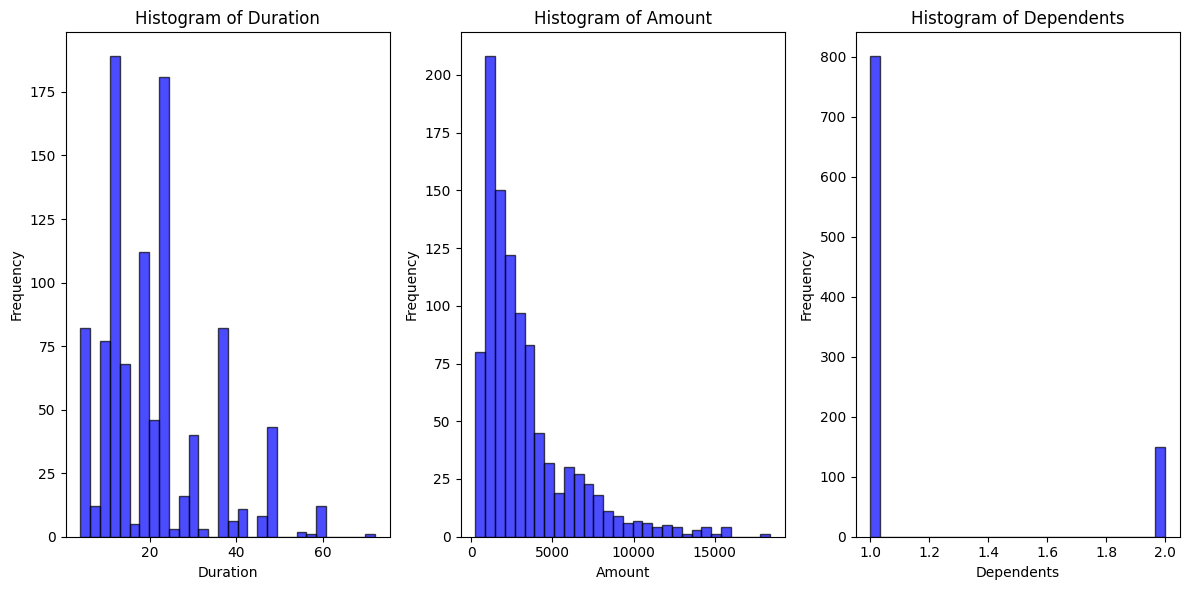

In [ ]:
numerical_columns = ["Duration", "Amount", "Dependents"]

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# **Conclusions**

# **Categorical Values**

**Checking_Account - Found 58 invalid values (5.80% of total data)** - Dealt with in [2a], invalid values are all empty cells

**Residence_Length - Found 12 invalid values (1.20% of total data)** - Invalid entries containing 5; since 4 is the upper-bounded category, we propose to amend all values containing 5 to 4 instead.


# **Numerical Values**

*Assumption: Our criteria for removing outliers is as follows:*
1. *Measurement errors, data entry or processing errors*
2. *Significantly distorts the overall patterns and insights of our analysis*

*For avoidance of doubt, we regard outliers that do not fall under [1] and [2] as natural variations in our population of interest, and they should consequently be left as is in our dataset.*

**Duration (6.7%)** - Evidently from the histogram above, the distribution is multimodal with multiple peaks and the outliers are relatively sparse. Since the distribution is not strictly normal and has a natural spread, outliers should be retained unless they are clear data entry errors. No action needed.

**Amount (7.3%)** - The credit amount should be regarded as a crucial variable. If the outliers represent real high-value loans, they might be still be valid. On the face of it, the distribution is right skewed with the long tail suggests some high-value outliers. If these extreme values significantly impact modeling, winsorisation can be conisdered.

**Installment (0.0%)** - No outliers, so no action needed.

**Age (2.3%)** - A small percentage of outliers likely represents rare but real cases (e.g., very young or old applicants). Instead of removing them, check for data entry errors and, if valid, leave them in.

**Credit_Rating (0.0%)** - No outliers, so no action needed.

**Num_Credits (0.6%)** - Very few outliers, should be kept.

**Dependents (14.9%)** - The high percentage of outliers suggests that further analysis is needed before taking action. Based on the box plot, the only observed values for Dependents are 1 and 2.

Since both the first and third quartiles are 1, the interquartile range (IQR) is 0, resulting in lower and upper bounds of 1. This incorrectly flags all non-1 values as outliers. However, 2 is not an egregiously large or evidently anomalous value and should therefore be retained in the dataset.

####**c.** For categorical variables, perform the necessary encoding.

Categorical variables are tranformed into numeric reps that makes it easy to process info contained that are ordinal, nominal or binary

For doing up this part, we will begin by understanding how may variables are categorical.
We will then look at whether they are nominal or ordinal (order or not ordered)

There are different encoding techniques that work best for different variable types like one-hot encoding for nominal variables unordered.

TLDR the method is: Before you encode, you must ensure missing values are handled. Then you do encoding. Then you validate findings to ensure accuracy!


**Steps key to this exercise:**
1. variable classification above [√]
2. missing value handling is done in reference to previous lines below [√]

  - Checking_Account - Found 58 invalid values (5.80% of total data) - Dealt with in [2a], invalid values are all empty cells
  - Residence_Length - Found 12 invalid values (1.20% of total data) - Invalid entries containing 5; since 4 is the upper-bounded category, we propose to amend all values containing 5 to 4 instead.

3. reasons for the different encoding choices are based on whether they are nominal or ordinal [√]
4. put in a few checks to ensure no null values left [√]

In [ ]:
###Doing the setup and the missing value handling

categorical_columns = [ "Checking_Account", "Payment_Status", "Purpose", "Savings_Account", "Employment", "Personal_Status",
    "Guarantors", "Residence_Length", "Assets", "Existing_Credits", "Housing_Type", "Occupation", "Telephone", "Foreign_Worker", "Approval"]

# handling_missing_values,  dealing with empty cells in checking and 5s in residence length
# it would be prudent to either drop the row with the invalid cells or to ensure that the invalid cell is changed to the most frequent value
### WE DECIDED TO REPLACE CHECKING ACCOUNT's MISSING VALUES TO MOST FREQ VALUE and RESIDENCE LENGTH's 5s to <MOST FREQ VALUE

# Not doing anymore:
      # df['Checking_Account'] = df['Checking_Account'].fillna(5.0) # 5 is an int but does not represent any of the current values rep the bank accnt values
      # valid_Checking = df.loc[df['Checking_Account'] != empty, "Checking_Account"]
      # most_freq_CA_value = valid_Checking.mode()[0]
      # df['Checking_Account'] = df['Checking_Account'].replace(null, most_freq_CA_value)
      # this is wrong ^^

#final answer to find empty and replace them with the most frequent value instead
valid_Checking = df[df['Checking_Account'].notna()]['Checking_Account']
most_freq_CA_value = valid_Checking.mode()[0]
print(f"\nMost Frequent Checking Account Value Is: {most_freq_CA_value}")
df['Checking_Account'] = df['Checking_Account'].fillna(most_freq_CA_value)

#calculating the most frequent valid value in Residence_Length, excluding values of 5
valid_RL = df[df['Residence_Length'].notna()]['Residence_Length']
most_freq_RL_value = valid_RL.mode()[0]
print(f"\nMost Frequent RL Value Is: {most_freq_RL_value}")
df['Residence_Length'] = df['Residence_Length'].replace(5, most_freq_RL_value)

#what are the ammounts now?
print(df['Residence_Length'].value_counts())
print(df['Checking_Account'].value_counts())


Most Frequent Checking Account Value Is: 4.0

Most Frequent RL Value Is: 4
Residence_Length
4    419
2    304
3    147
1    130
Name: count, dtype: int64
Checking_Account
4.0    429
1.0    262
2.0    249
3.0     60
Name: count, dtype: int64



**Reasoning for splliting the categorical variables by type**

What is nominal or ordinal?
  - Nominal values have no inherent ranking
  - Ordinal have an inherent order that dictates rising or decreasing significance
  - Binary is just either or

We evaluated numerous encoding methods:
  1. One Hot Encoding
    - Probably best for nominal variables and this complicates stuff a bit as it increases dimensionality
    - for each subcategory in categorical column then you create a column for binary representation of that subcategory
  2. Ordinal Encoding
    - this is good for ordinal variables as name suggests and preserves the order, is more efficient when computed
  3. Label Encoding
    - for ordinal too and is simple but not rly for nominal

All in all, we looked at all the variables, applied a categorical data type label, and then put our chosen encoding method there

| variable         | data type                            | chosen encoding method  |
|------------------|--------------------------------------|--------------------------|
|
| Checking_Account | Categorical (Ordinal)| Ordinal Encoding        |
| Payment_Status   | Categorical (Ordinal)                | Ordinal Encoding         |
| Purpose          | Categorical (Nominal)                | One-Hot Encoding         |
| Savings_Account  | Categorical (Ordinal)        |      Ordinal Encoding         |
| Employment       | Categorical (Ordinal)                | Ordinal Encoding         |
| Personal_Status  | Categorical (Nominal)                | One-Hot Encoding         |
| Guarantors       | Categorical (Ordinal)                | Ordinal Encoding         |
| Residence_Length | Categorical (Ordinal)                | Ordinal Encoding         |
| Assets           | Categorical (Nominal)                | One-Hot Encoding         |
| Existing_Credits | Categorical (Nominal)                | One-Hot Encoding         |
| Housing_Type     | Categorical (Ordinal)                | Ordinal Encoding         |
| Occupation    | Categorical (Ordinal)                | Ordinal Encoding         |
| Telephone        | Categorical (Binary)                 | Label Encoding          |
| Foreign_Worker   | Categorical (Binary)                 | Label Encoding          |
| Approval         | Categorical (Binary)                 | Label Encoding          |



Justification for categorical data type variables:
1. Checking acccount can go either way as 1 to 3 are representative of an increasing order in significance but 4 is not part of the natural order. Final conclusion is to treat it as ordinal because i can put 4 infront of 123 in sequential order
2. Payment Status is ordinal because it goes from no credit taken to varying states of credit being paid back to a critical account of not paying it back at all. Increasing order of severity?
3. purpose is nominal, no clear order
4. savings account is ambiguous because 1 to 4 have a clear order but 5 is not in line with the order. final conclusion is to treat it as ordinal like point 1. we will do manual mapping to put 5 at the start.
5. employment is clearly in order of duration so it is ordinal
6. personal status is nominal because no order present
7. guarantors can be seen as ordinal aa it is in increasing amount of significance in terms of guranatee confirmation, so it is no guarantee (none), some level of shared guarantee ( co-applicant), and then highest level of guarantee which is guarantor.
8. Residence length is clearly in order of duration thus it is ordinal
9. Assets are nominal because no clear order in the categories
10. Existing credit has no order present so it is nominal
11. Housing Type I would argue is ordinal due to increasing order of collateral present (rent implies lesser, own implies property ownership, for free I am not sure but I assume it means an accomodation type more cost-saving than owning house)
12. Occupation is ordinal as it ranges in increasing order of hierarchial role (unemployed to management)
13. Telephone, foreign worker and approval are all binary variables which indicates whether or not a telephone number is on file for the applicant, if they are a FW or not, and if there is approval or not.
---

How to do validation to check the effects of encoding?



In [ ]:
###Encoding Setup
df_encoded = df.copy()

nominal_col= ["Purpose", "Personal_Status", "Assets", "Existing_Credits"]
ordinal_col = ["Checking_Account", "Savings_Account", "Payment_Status", "Employment", "Guarantors", "Residence_Length", "Housing_Type", "Occupation"]
binary_col = ["Telephone", "Foreign_Worker", "Approval"] #see rationale above for why these categories

# mapping for sorting as string method did not work + mapping for just top 2 did not work
#ordinal mapping

#### VERY IMPT TO NOTE THE NEW 1P POSITION
mapping_dict = {
  'Checking_Account' : {4:1, 1:2, 2:3, 3:4}, # not 4 is lowest
  'Savings_Account' : {5:1, 1: 2, 2: 3, 3: 4, 4: 5}, #note 5 is lowest
  'Payment_Status' : {0:1, 1: 2, 2: 3, 3: 4, 4: 5},
  'Employment' : {1:1, 2: 2, 3: 3, 4: 4, 5: 5},
  'Guarantors' : {1:1, 2: 2, 3: 3},
  'Residence_Length' : {1:1, 2: 2, 3: 3, 4: 4},
  'Housing_Type' : {1:1,2:2, 3:3},
  'Occupation' : {1:1, 2:2, 3:3, 4:4}
}

### executing ordinal mapping and doing some error handling
for col, mapping in mapping_dict.items():
    nullWhich = df_encoded[col].isnull() # kept getting null values asfter each code run so this will identify original null
    df_encoded[col] = df_encoded[col].map(mapping)
    df_encoded.loc[nullWhich, col] = np.nan # restore original null
    df_encoded[col] = df_encoded[col].fillna(-1) ### NEW NaN are now -1

# nominal encoding
df_encoded = pd.get_dummies(df_encoded, columns=nominal_col, drop_first=True)

# print(df_encoded.head())

# now is label encoding
for col in binary_col:
    label_enc = LabelEncoder()
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

#--------------------------------------------------------------------------------
#checks
print(f"\nOriginal shape:{df.shape}")
print(f"\nEncoded shape:{df_encoded.shape}") # should give a few more due to nominal cats turned into their own columns
# check for null
print(df_encoded.isnull().sum()) # previously, we got 1000 null values for all ordinal values, which was confusing,
# thus i had to do the above .isnull() and also this counter

#binary checks
for col in binary_col:
    print(f"\n{col} has the values: {sorted(df_encoded[col].unique())}")

## final
## need to add encoded columns back to df without overwriting the numerical columns present
df_final = df.copy()
df_final.update(df_encoded)
df = df_final


Original shape:(1000, 23)

Encoded shape:(1000, 36)
ID                     0
Checking_Account       0
Duration               0
Payment_Status         0
Amount                 0
Savings_Account        0
Employment             0
Installment            0
Guarantors             0
Residence_Length       0
Age                    0
Credit_Rating          0
Housing_Type           0
Num_Credits            0
Occupation             0
Dependents            50
Telephone              0
Foreign_Worker         0
Approval               0
Purpose_1              0
Purpose_2              0
Purpose_3              0
Purpose_4              0
Purpose_5              0
Purpose_6              0
Purpose_8              0
Purpose_9              0
Purpose_10             0
Personal_Status_2      0
Personal_Status_3      0
Personal_Status_4      0
Assets_2               0
Assets_3               0
Assets_4               0
Existing_Credits_2     0
Existing_Credits_3     0
dtype: int64

Telephone has the values: [0, 1]


**Response.**

### 3.	Exploratory analysis and visualization [50% of Part I]

####**a.** For each variable, provide relevant summary statistics



Numerical Data:

In [ ]:
df_numerics = df[["Duration","Amount","Installment","Age","Credit_Rating","Num_Credits","Dependents"]]
df_numerics.describe()

,Duration,Amount,Installment,Age,Credit_Rating,Num_Credits,Dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,950.000000
mean,20.814000,3275.058000,2.973000,35.551000,70.330000,1.407000,1.156842
std,11.941524,2803.297505,1.118715,11.371223,35.838185,0.577654,0.363843
min,4.000000,250.000000,1.000000,19.000000,-1.000000,1.000000,1.000000
25%,12.000000,1371.750000,2.000000,27.000000,37.000000,1.000000,1.000000
50%,18.000000,2332.000000,3.000000,33.000000,94.000000,1.000000,1.000000
75%,24.000000,3965.250000,4.000000,42.000000,99.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,99.000000,4.000000,2.000000


Categorical Data:

In [ ]:
cat_cols = df_encoded.drop(["Duration","Amount","Installment","Age","Credit_Rating","Num_Credits","Dependents"], axis=1)
summary_data = []

for col in cat_cols:
    value_counts = df_encoded[col].value_counts(dropna=False)

    mode_value = value_counts.idxmax()
    mode_count = value_counts.max()

    least_value = value_counts.idxmin()
    least_count = value_counts.min()

    summary_data.append({
        'Column': col,
        'Mode': mode_value,
        'Mode Count': mode_count,
        'Least Frequent': least_value,
        'Least Count': least_count,
        'Unique Categories': df_encoded[col].nunique(dropna=False)
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,Column,Mode,Mode Count,Least Frequent,Least Count,Unique Categories
0,ID,1,1,1,1,1000
1,Checking_Account,1.0,429,4.0,60,4
2,Payment_Status,3.0,530,1.0,40,5
3,Savings_Account,2.0,603,5.0,48,5
4,Employment,3.0,339,1.0,62,5
5,Guarantors,1.0,907,2.0,41,3
6,Residence_Length,4.0,419,1.0,130,4
7,Housing_Type,2.0,714,3.0,107,3
8,Occupation,3.0,630,1.0,22,4
9,Telephone,0,596,1,404,2


####**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

ID uniquely identifies the application

In [ ]:
unique_count = df.ID.nunique()
n_rows, n_cols = df.shape
print(f"# unique ID : {unique_count}")
print(f"# rows : {n_rows}")

# unique ID : 1000
# rows : 1000


1. From Purpose chart, since there are 0 records with Purpose=7, no one takes a loan to go on a vacation
2. From Guarantors chart, since more than 800 records have Guarantors=1 and less than 100 have Guarantors=2 or Guarantors=3, majority of the applicants do not have guarantors
3. From Foreign_Worker chart, since about 1000 records have Foreign_Worker=0 and less than 100 have Foreign_Worker=1, majority of the applicants are foreign workers
4. From Approval chart, since about 300 records have Approval=0 and about 700 have Approval=1, about two thirds of the applications are approved

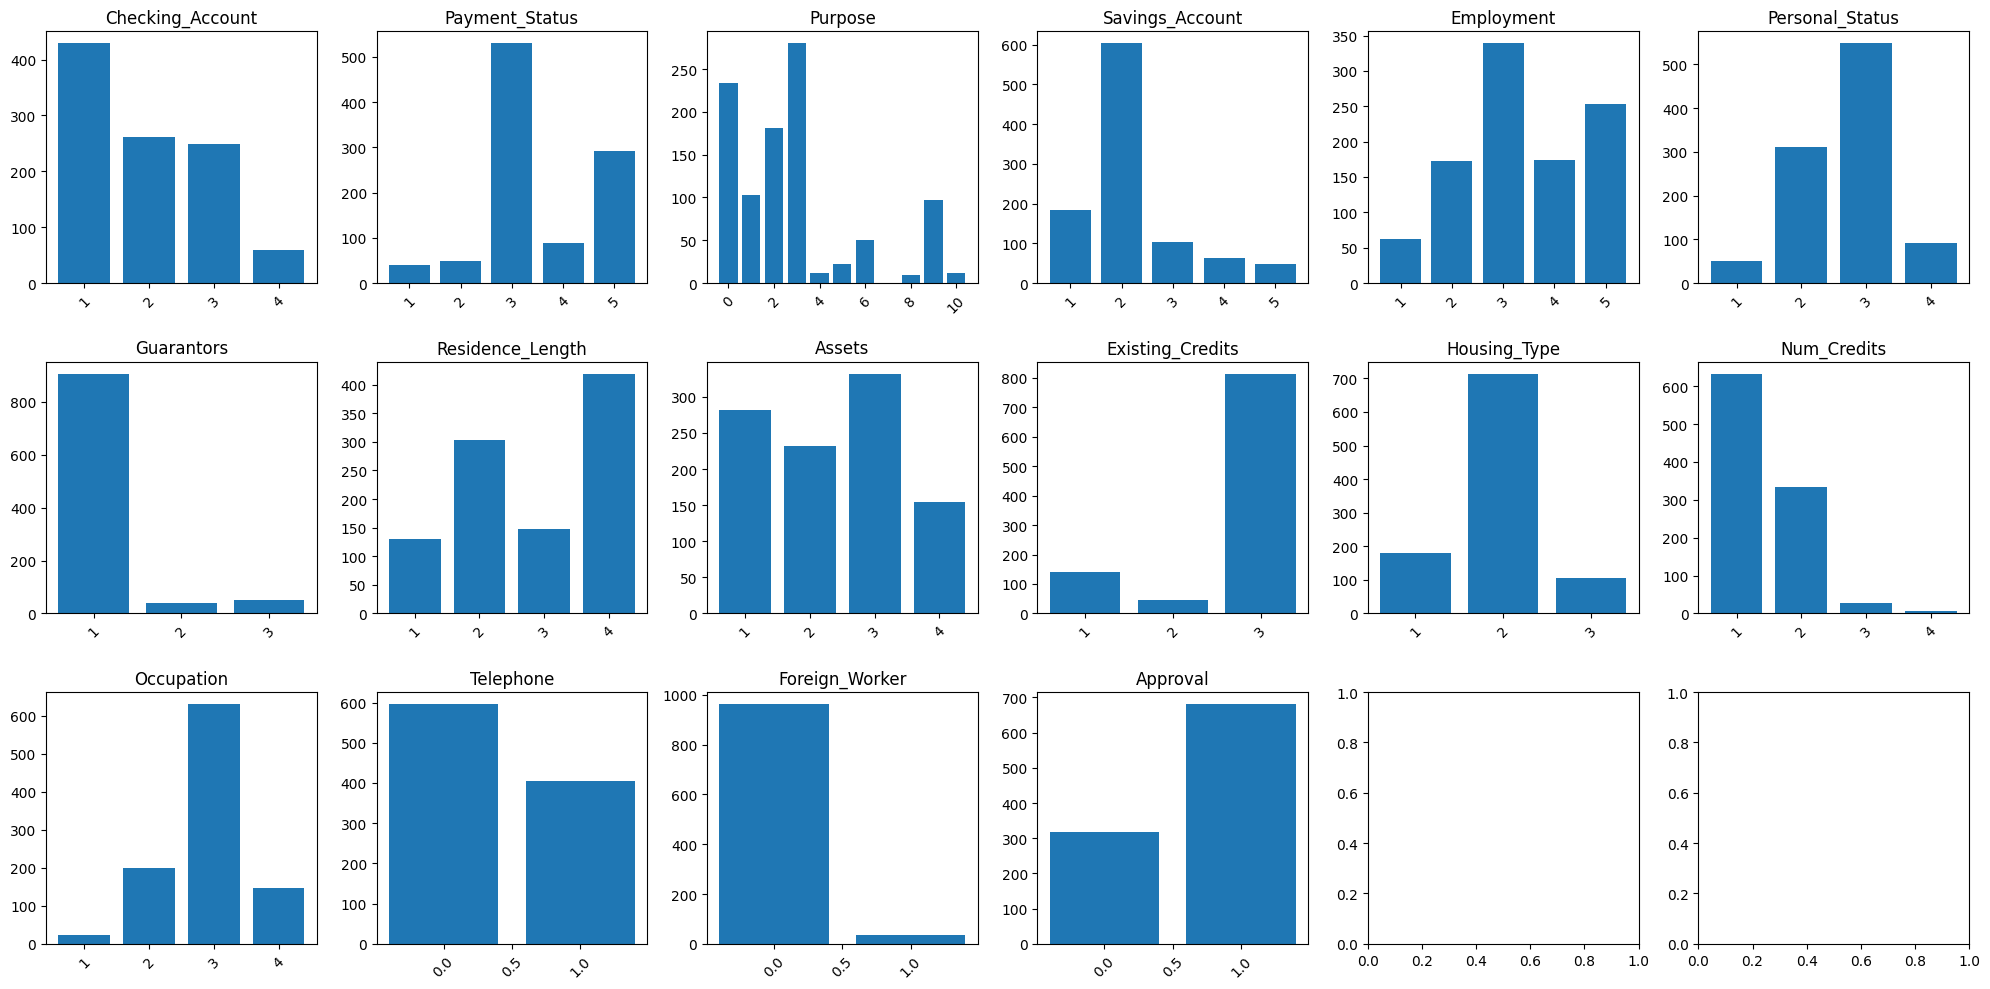

In [ ]:
df_categoricals = df[["Checking_Account","Payment_Status","Purpose","Savings_Account","Employment","Personal_Status","Guarantors","Residence_Length","Assets","Existing_Credits","Housing_Type","Num_Credits","Occupation","Telephone","Foreign_Worker","Approval"]]
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df_categoricals.columns):
    value_counts = df_categoricals[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

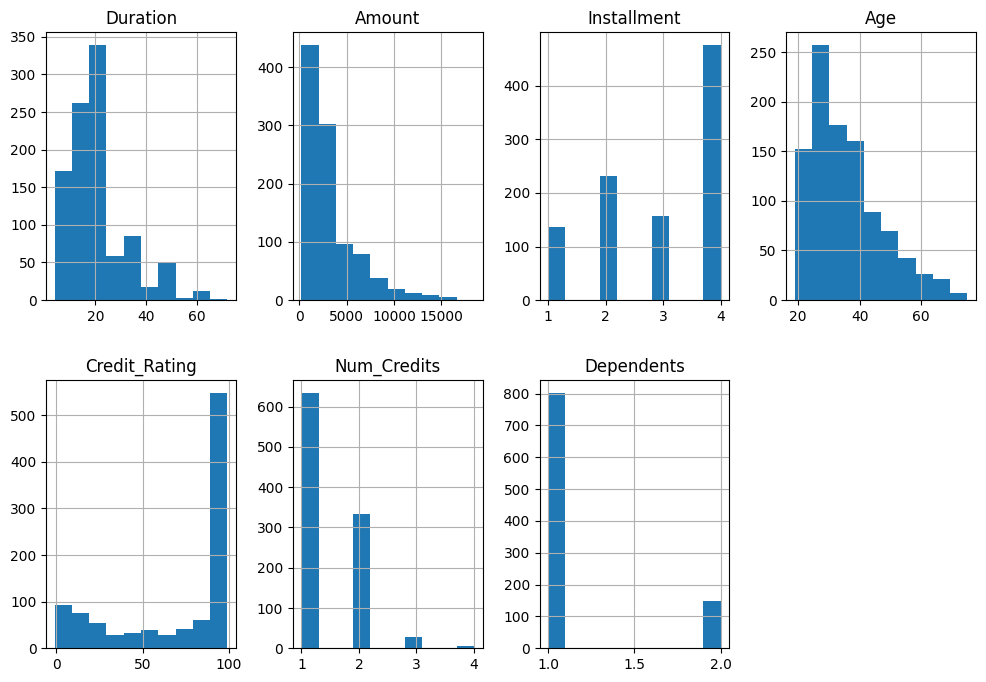

In [ ]:
df_numerics = df[["Duration","Amount","Installment","Age","Credit_Rating","Num_Credits","Dependents"]]
df_numerics.hist(layout=(2, 4), figsize=(12, 8))
plt.show()

####**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

In [ ]:
df2 = df.drop(columns=['ID', 'Telephone', 'Dependents'])
df2.corr()

,Checking_Account,Duration,Payment_Status,Purpose,Amount,Savings_Account,Employment,Installment,Personal_Status,Guarantors,Residence_Length,Assets,Age,Credit_Rating,Existing_Credits,Housing_Type,Num_Credits,Occupation,Foreign_Worker,Approval
Checking_Account,1.000000,0.050716,-0.147120,0.080319,0.021536,0.000433,-0.123790,-0.059501,-0.032626,0.071620,-0.069722,0.017415,-0.039191,-0.242059,-0.077848,0.005289,-0.084369,-0.060445,0.001219,-0.166347
Duration,0.050716,1.000000,-0.076435,0.142761,0.616252,-0.059619,0.053309,0.073804,0.019634,-0.022641,0.040475,0.303035,-0.036140,-0.238076,-0.059216,0.147134,-0.013539,0.206627,-0.134985,-0.187728
Payment_Status,-0.147120,-0.076435,1.000000,-0.090336,-0.058998,0.005209,0.138225,0.044375,0.042171,-0.040676,0.060186,-0.053777,0.147244,0.318275,0.159957,0.061428,0.437066,0.010350,0.028554,0.227626
Purpose,0.080319,0.142761,-0.090336,1.000000,0.072707,0.010065,0.016013,0.048369,0.000157,-0.017607,-0.034278,0.010966,-0.000681,-0.030545,-0.100230,0.013495,0.054935,0.008085,-0.113244,-0.018669
Amount,0.021536,0.616252,-0.058998,0.072707,1.000000,-0.104319,-0.003245,-0.264528,-0.016817,-0.025435,0.030829,0.310037,0.037901,-0.152678,-0.061974,0.130240,0.024699,0.287807,-0.027344,-0.139942
Savings_Account,0.000433,-0.059619,0.005209,0.010065,-0.104319,1.000000,0.014600,-0.000805,-0.038863,-0.057540,-0.006974,-0.025651,-0.019729,0.059836,0.006969,-0.049443,-0.004176,-0.040803,-0.016610,0.027996
Employment,-0.123790,0.053309,0.138225,0.016013,-0.003245,0.014600,1.000000,0.126161,0.111278,-0.008116,0.246946,0.087187,0.258150,0.208813,-0.007279,0.115077,0.125791,0.101225,-0.022845,0.100367
Installment,-0.059501,0.073804,0.044375,0.048369,-0.264528,-0.000805,0.126161,1.000000,0.119308,-0.011398,0.049420,0.053391,0.055937,-0.027341,0.007894,0.091229,0.021669,0.097755,-0.094762,-0.051065
Personal_Status,-0.032626,0.019634,0.042171,0.000157,-0.016817,-0.038863,0.111278,0.119308,1.000000,0.050634,-0.026983,-0.006940,0.005497,0.096759,-0.026747,0.098934,0.064672,-0.011956,0.073103,0.098701
Guarantors,0.071620,-0.022641,-0.040676,-0.017607,-0.025435,-0.057540,-0.008116,-0.011398,0.050634,1.000000,-0.026478,-0.155450,-0.030755,-0.070505,-0.038235,-0.065449,-0.025447,-0.057963,0.140190,0.010133


In [ ]:
pd.crosstab(df.Telephone, df.Approval)

Approval,0,1
Telephone,,
0,199,397
1,120,284


In [ ]:
table = pd.crosstab(df.Telephone, df.Approval)

total_applicants = table[0][0] + table[0][1] + table[1][0] + table[1][1]
approved = table[1][0] + table[1][1]
no_telephone = table[0][0] + table[1][0]
has_telephone = table[0][1] + table[1][1]

prob_1 = approved / total_applicants
prob_1_given_no_telephone = table[1][0] / no_telephone
prob_1_given_has_telephone = table[1][1] / has_telephone

print(f"P(Approval=1) : {prob_1}")
print(f"P(Approval=1|Telephone=0) : {prob_1_given_no_telephone}")
print(f"P(Approval=1|Telephone=1) : {prob_1_given_has_telephone}")

P(Approval=1) : 0.681
P(Approval=1|Telephone=0) : 0.6661073825503355
P(Approval=1|Telephone=1) : 0.7029702970297029


Given that the probabilities of approval are similar regardless of telephone, having a telephone is independent of approval outcome.

Next, we will look at the relationship between credit rating and approvals. Genrally speaking a higher credit rating should lead to a higher probability of loan being approved, but let us ascertain that through some visualisation.

In [ ]:
table1 = pd.crosstab(df.Credit_Rating, df.Approval)
print(table1)

Approval        0    1
Credit_Rating         
-1              1    0
 0              4    0
 1              7    0
 2             15    0
 3             12    0
...            ..  ...
 95             3   16
 96             4   27
 97             3   41
 98             3   59
 99            25  310

[98 rows x 2 columns]


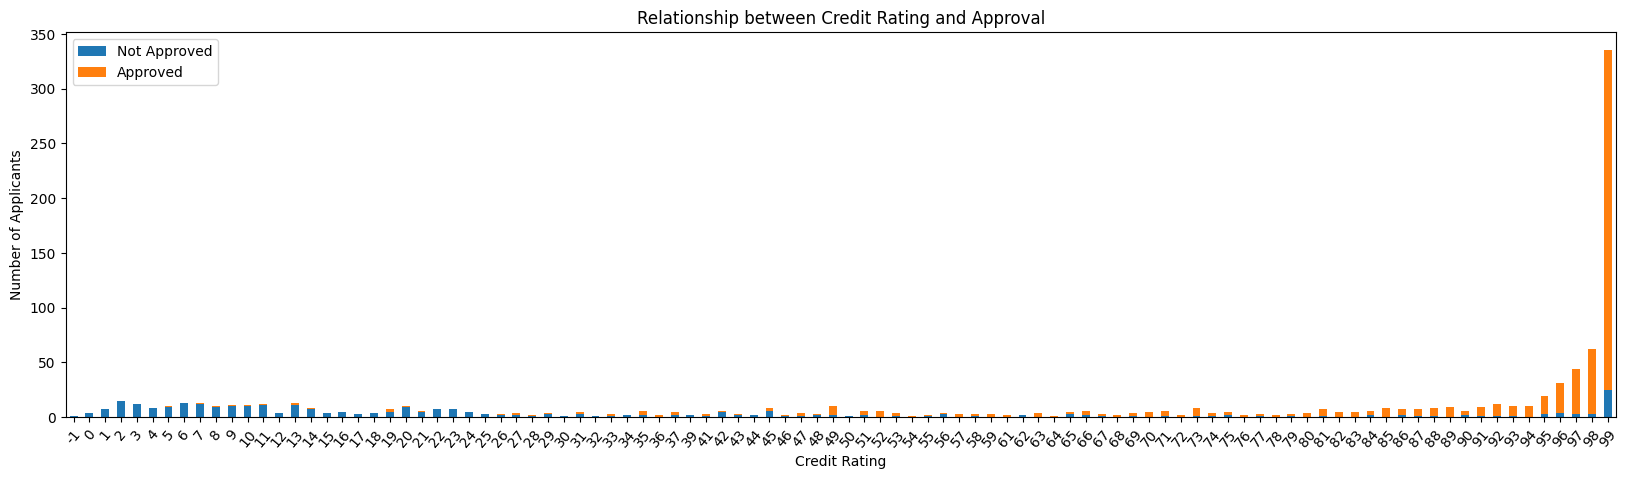

In [ ]:
table1.plot(kind='bar', stacked=True, figsize=(20, 5))
plt.xlabel("Credit Rating")
plt.xticks(rotation=50)
plt.ylabel("Number of Applicants")
plt.title("Relationship between Credit Rating and Approval")
plt.legend(["Not Approved", "Approved"])
plt.show()

From the bar chart visualisation, we can conclude that as the credit rating increases, the number of loan approvals increase significantly.

We can also take a look at the relationship between the credit rating and employment.

In [ ]:
df3 = df[['Employment', 'Credit_Rating']]

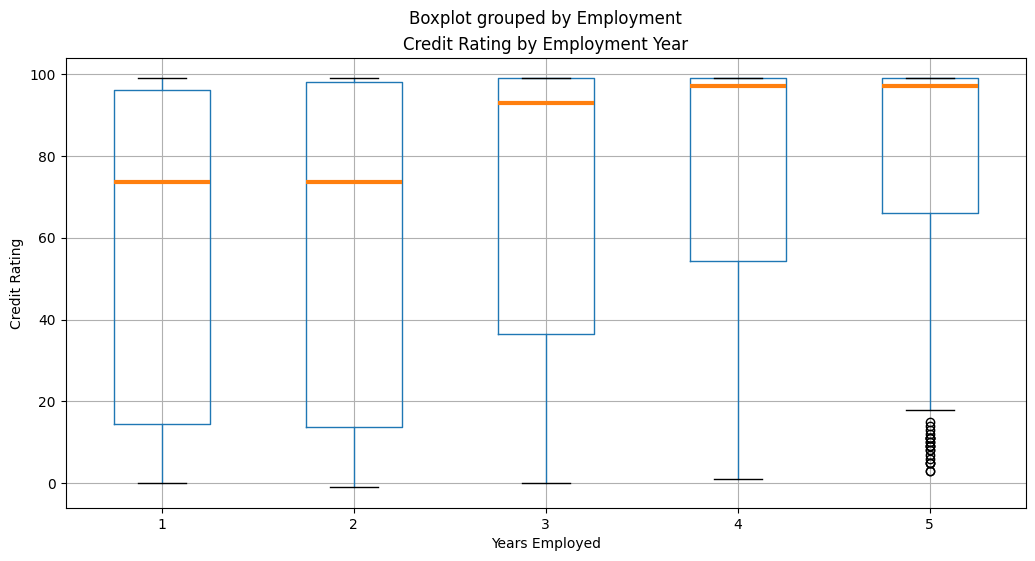

In [ ]:
df3.boxplot(column='Credit_Rating', by='Employment', figsize=(12, 6), medianprops={'linewidth': 3})
plt.title("Credit Rating by Employment Year")
plt.xlabel("Years Employed")
plt.ylabel("Credit Rating")
plt.show()

As the number of years employed increases, the median credit rating generally increases with the exception of a few outliers.

Lastly, we can also take a look at the relationship between foreign workers and approval rates.


In [ ]:
table2 = pd.crosstab(df.Foreign_Worker, df.Approval)
print(table2)

Approval          0    1
Foreign_Worker          
0               313  650
1                 6   31


From table2, we see that there is a higher number of foreign workers having their loan approved. However, can we conclude that a foreign worker is more likely to have their claim approved?

Let us take a look at a visual representation of a data for easier analysis, and check if the following equation indeed holds:

```
P(Approval = 1 | Foreign_Worker = 0) > P(Approval = 1 | Foreign_Worker = 1)
```

In [ ]:
norm_table = pd.crosstab(df.Foreign_Worker, df.Approval, normalize='index') * 100
print(norm_table)

Approval                0          1
Foreign_Worker                      
0               32.502596  67.497404
1               16.216216  83.783784


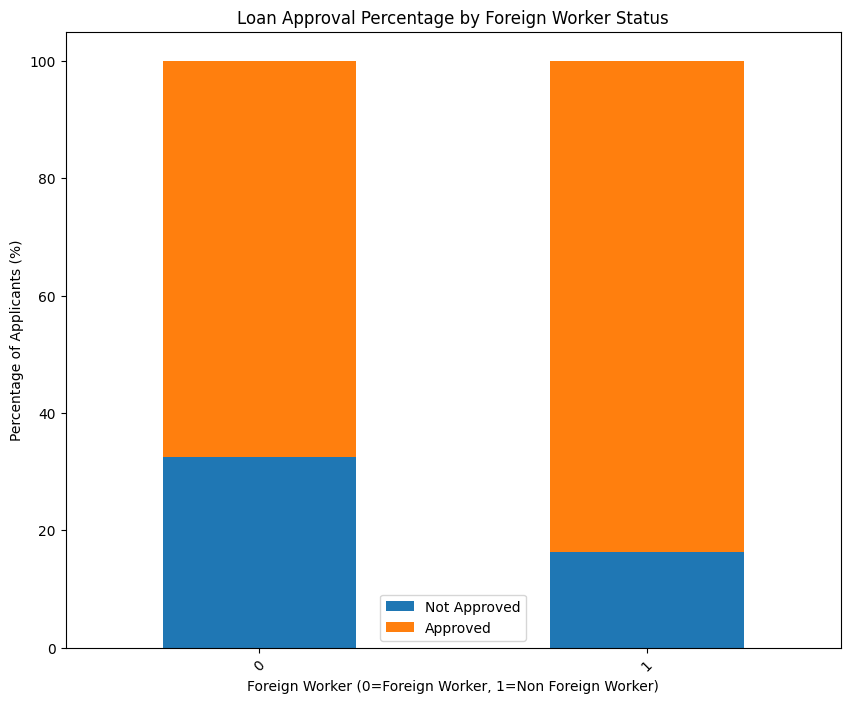

In [ ]:
norm_table.plot.bar(stacked=True, figsize=(10,8))
plt.xlabel("Foreign Worker (0=Foreign Worker, 1=Non Foreign Worker)")
plt.ylabel("Percentage of Applicants (%)")
plt.xticks(rotation=45)
plt.title("Loan Approval Percentage by Foreign Worker Status")
plt.legend(["Not Approved", "Approved"])

Now that we have normalized the initial table, we were able to ensure we are comparing the % of approvals for each category under Foreign_Workers.

Looking at the stacked chart, we can see immediately that the probability of the loan of a foreign worker being approved, is indeed higher than that of a non-foreign worker. Therefore, the equation above holds.

However, the difference is not as significant as we would have initially thought when solely looking at the actual numbers in table2.

## Part II: Modeling [12% of final grade]

### 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.


One regression problem would be to predict the loan amount based on applicant characteristics like income, credit history, savings, and loan purpose.

One classification problem would be to to predict loan approval using features such as credit score, employment stability, loan purpose and existing debts.


**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

We will be investigating the classification problem to optimise loan approval decisions and minimise financial risks.

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

Approval: Determines credit access while balancing risk (default prevention) and profitability (approving reliable candidates).

### 2. Model training [30% of Part II]

**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

**ID:** Exclude (identifier with no predictive value).

**Credit_Rating:** Directly measures the individuals creditworthiness which would be relevant to loan approval (See diagram for Credit_Rating and Approval above).

**Checking_Account:** Indication of individuals financial stability, lower account balance would decrease approval chances.

**Amount:** Likely to be important since larger loans decrease approval probability.

**Housing_Type:** Homeownership likely increases approval chances.

**Installment:** Higher installment implies greater financial burden and would be relevant to approvals at large.

**Duration:** Loan durations would affect general risk assessment.

**Payment_Status:** This would be relevant to the indiviudals credit history and therfore would be relevant for consideration in approvals.

**Age, Employment, Gurantors, Residence_Length, Assets, Savings_Account, Existing_Credits, Num_Credits, Telephone:** These factors can indicate financial stability and income potential of the individual.

**Purpose:** Indicates risk level



***LOWER IMPORTANCE (but still included):***

**Personal_Status, Occupation, Dependents, Foreign_Worker:** Provides further background about the individual which may have predictive value.






**b.** Split the dataset into train and test sets. Describe how you split step by step.

In [ ]:
from sklearn.model_selection import train_test_split

features = df_encoded.drop(["Approval", "ID"], axis=1)
target = df_encoded["Approval"]

x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.25,
    random_state=42
)

print(f"Training set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")

Training set shape: (750, 34)
Testing set shape: (250, 34)


**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

We will be training two models - Logistic Regression and RandomForest

Logistic Regression:
- The coefficients provide insights into how each feature contributes to the likelihood of loan approval.
- It should in theory be a good baseline for binary classification tasks.

RandomForest:
- Random Forest can capture complex, non-linear patterns in the data that Logistic Regression might miss.
- It reduces overfitting through averaging predictions from multiple decision trees.
- We assume that RandomForest typically achieves higher accuracy than Logistic Regression for datasets with non-linear relationships and interactions between features.

**d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Logistic Regression

In [ ]:
pipe_lr = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LogisticRegression(random_state=30)
)

pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=30))])

In [ ]:
training_accuracy_lr = pipe_lr.score(x_train, y_train)
print(f"Logistic Regression Training Accuracy: {training_accuracy_lr:.2f}")

coefficients = pipe_lr.named_steps["logisticregression"].coef_[0]
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})

coef_df['Abs(Coefficient)'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs(Coefficient)', ascending=False).drop(columns='Abs(Coefficient)').reset_index(drop=True)

coef_df

Logistic Regression Training Accuracy: 0.88


,Feature,Coefficient
0,Credit_Rating,2.176852
1,Purpose_1,0.465809
2,Personal_Status_2,-0.460923
3,Amount,-0.364816
4,Housing_Type,0.358736
5,Assets_4,-0.302126
6,Personal_Status_3,-0.299630
7,Guarantors,0.291428
8,Existing_Credits_3,-0.234376
9,Installment,-0.224762


## RandomForest

In [ ]:
pipe_rf = make_pipeline(
    SimpleImputer(strategy="median"),
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=30)
)

pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, random_state=30))])

In [ ]:
training_accuracy_rf = pipe_rf.score(x_train, y_train)
print(f"Random Forest Training Accuracy: {training_accuracy_rf:.2f}")

feature_importances = pipe_rf.named_steps["randomforestclassifier"].feature_importances_
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
importance_df

Random Forest Training Accuracy: 0.90


,Feature,Importance
0,Credit_Rating,0.576586
1,Checking_Account,0.061423
2,Amount,0.052376
3,Duration,0.047294
4,Payment_Status,0.039384
5,Age,0.035920
6,Employment,0.024240
7,Savings_Account,0.016684
8,Installment,0.016341
9,Housing_Type,0.014187


In [ ]:
y_pred_lr = pipe_lr.predict(x_test)
y_pred_rf = pipe_rf.predict(x_test)


accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Logistic Regression Accuracy: 0.868
Random Forest Accuracy: 0.872


**Response.**

### 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

In [ ]:
predVar_df = pd.DataFrame({
    'True Approval': y_test,
    'Logistic Regression Prediction': y_pred_lr,
    'Random Forest Prediction': y_pred_rf
})

print("Our predictions on the Test Data to show models' outcomes:")
# print("Our sample predictions of the test data to illustrate model efficacy")
# display(predVar_df.head(10))
display(predVar_df)

Our predictions on the Test Data to show models' outcomes:


,True Approval,Logistic Regression Prediction,Random Forest Prediction
521,0,0,0
737,0,0,0
740,0,0,0
660,1,1,1
411,1,1,1
...,...,...,...
109,1,1,1
430,0,1,1
77,0,0,1
84,1,1,1


b. Describe the metric you use to evaluate your model(s). Report the test scores for each model.


We conducted preliminary checks of accuracy earlier, and will now continue with other evaluative checks using precision score and recall score that utilise numbers of True Positive and False Positive/Negative.





If the purpose of the model is to help banks evaluate whether to loan money then FP should be low and FN can be slightly higher.


Our final decision is to evaluate precision, accuracy, recall, f1 score, establish a confusion matrix for each model

For additional learning, we are trying to use a new concept as well.

Ideally both FP and FN should be low, and another way we can observe these occurences is through the ROC curve (Receiver Operating Characteristic Curve).

In [ ]:
# add all metrics we will be
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix



In [ ]:
df = predVar_df
y_true = df["True Approval"]

for model in ["Logistic Regression Prediction", "Random Forest Prediction"]:
    y_pred = df[model]

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    cm_df = pd.DataFrame(
        cm,
        index=["Actual 0", "Actual 1"],
        columns=["Predicted 0", "Predicted 1"]
    )

    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    print(f"--- {model} ---")
    print(f"True Positives (TP):  {tp}")
    print(f"False Negatives (FN): {fn}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN):  {tn}")

    print("\n")

    print(f"--- {model} ---") ##  relevant for ROC AUC discussion later
    print(f"True Positive Rate (TPR): {tpr:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")

    print("\n")

    print(f"--- {model} ---")
    print(f"Accuracy:     {acc:.4f}")
    print(f"Precision:       {prec:.4f}")
    print(f"Recall:          {rec:.4f}")
    print(f"F1 Score:        {f1:.4f}")
    print("Confusion Matrix:")
    print(cm_df)
    print()

--- Logistic Regression Prediction ---
True Positives (TP):  154
False Negatives (FN): 14
False Positives (FP): 19
True Negatives (TN):  63


--- Logistic Regression Prediction ---
True Positive Rate (TPR): 0.9167
False Positive Rate (FPR): 0.2317


--- Logistic Regression Prediction ---
Accuracy:        0.8680
Precision:       0.8902
Recall:          0.9167
F1 Score:        0.9032
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           63           19
Actual 1           14          154

--- Random Forest Prediction ---
True Positives (TP):  159
False Negatives (FN): 9
False Positives (FP): 23
True Negatives (TN):  59


--- Random Forest Prediction ---
True Positive Rate (TPR): 0.9464
False Positive Rate (FPR): 0.2805


--- Random Forest Prediction ---
Accuracy:        0.8720
Precision:       0.8736
Recall:          0.9464
F1 Score:        0.9086
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           59           23
Actual 1            9          159



Above, we can see that Logistic Regression model is more accurate and has a higher precision score, but has a lower recall score. The F1 score is also very close, in favour of the logistic regression model.

The confusion matrix also shows that perhaps further analysis is needed, thus we lean in favour of the Logistic Regression model but continue onwards to analyse the ROC AUC scores, especially in light of LR model having a lower TPR but lower FPR as well, where the decreased FPR is more significant than having the lower TPR.

Here we assume TPR is important as a success metric, but FPR should be lowered so that our models are not producing false alerts.

**Now we analyse ROC AUC scores for both models which measures the relationship between the true positive rate and false positive rate**

TPR = TP/(TP+FN) this is the y-axis

FPR = FP/(FP+TN) this is the x-axis


Based on the curve, the area under it means that FN and FP are closer to zero.

For a lot of the instruction, we used guidance from a tutorial from Datacamp (Chugh, 2024) and an article (Arya, 2022)

In [ ]:
# ---- new concepts we are trying ---
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

AUC - Area Under Curve
Receiver Operating Characteristic Curve's AUC for LR shows: 0.8998
Receiver Operating Characteristic Curve's AUC for RF shows: 0.8925
The Area Under these ROC curves represents how close to fully correct the predicions are.
The closer to 1, the more accurate predictions are as it implies TP rate is 1 and FP rate is 0


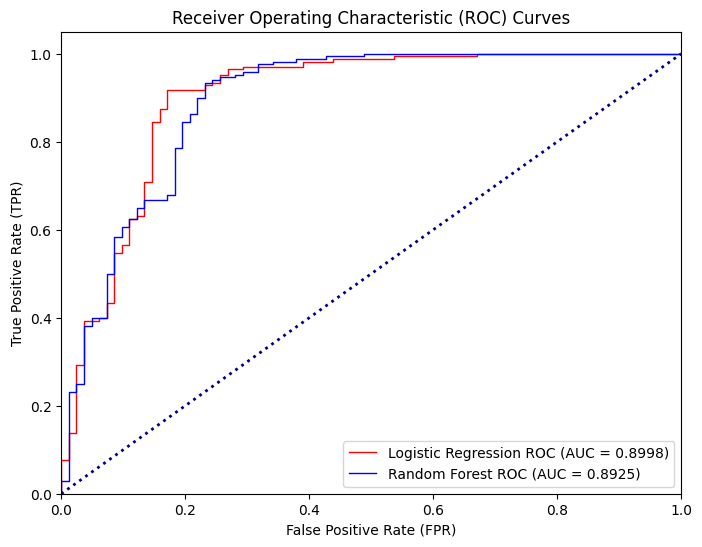

In [ ]:
# ROC AUC for both curves! Out of syllabus but trying
# ----------------------------------------------------------------------

# not finding labels, but directly finding probabilities for frurther analysis here
y_probs_lr = pipe_lr.predict_proba(x_test)[:,1]
y_probs_rf = pipe_rf.predict_proba(x_test)[:,1]


# calculating roc and auc  values to curve for logistic regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# calculating roc and auc. values for the curve in random forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC AUC values
roc_auc_lr = roc_auc_score(y_test, pipe_lr.predict_proba(x_test)[:,1])
roc_auc_rf = roc_auc_score(y_test, pipe_rf.predict_proba(x_test)[:,1])

print(f"Receiver Operating Characteristic Curve's AUC for LR shows: {roc_auc_lr:.4f}")
print(f"Receiver Operating Characteristic Curve's AUC for RF shows:{roc_auc_rf:.4f}")
print("The closer to 1, the more accurate predictions are as it implies TP rate is 1 and FP rate is 0")

# plotting the ROC AUC graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='red', lw=1,
         label=f'Logistic Regression ROC (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=1,
         label=f'Random Forest ROC (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

**Documentation of our team's considerations at this juncture:**

Notably, we surmise that the relationship between the variables and approval is likely non-linear. Hence by intuition, we would assume that a decision tree would be more suitable.

However, in consideration of the fact that loan approval decisions penalize false positives more heavily (we can assume this from a regulatory or operational standpoint) , we favor a model with lower FPR and higher precision, even if its recall is slightly lower—and with good overall discrimination (ROC‐AUC). In our case, Logistic Regression exhibits a lower false positive rate (23.1% vs. 28.05%), higher precision (0.8902 vs. 0.8736) and a marginally higher ROC‐AUC (0.8998 vs. 0.8925) than Random Forest.

**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

We choose the logistic regression model. After our analysis on the ROC AUC and other previously ascertained metrics, we value having the tradeoff of slightly less true positives identified to have lesser false positives identified. In the context of loan approvals, banks ideally maintain a lower risk tolerance.

### 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

The model implies that credit rating is the most significant factor with foreign_worker being the least important standalone factor. This is inconsistent with our intuition and EDA. Maybe because foreign_worker is an imbalanced binary categorical variable. Additionally, other confounding variables that influence foreign_worker may not be identified in the EDA.


**b.** Share any lesson you have learned from the project, in **no more than 50 words**.

We realised the importance of EDA after seeing that appropriate feature encoding methods and suitable models will greatly improve the reliability of our results. Additionally, being able to carry out EDA appropriately is requisite on domain knowledge, loan approvals in this case.

**c.** List any references and sources you have cited.

Arya, N. (2022, October). Classification metrics walkthrough: Logistic regression with accuracy, precision, recall, and Roc. KDnuggets. https://www.kdnuggets.com/2022/10/classification-metrics-walkthrough-logistic-regression-accuracy-precision-recall-roc.html

Chugh, V. (2024, September 10). AUC and the ROC curve in machine learning. DataCamp. https://www.datacamp.com/tutorial/auc
